# Классификация


**Классификация** — это область машинного обучения с учителем, которая пытается предсказать, к какому классу или категории принадлежит тот или иной объект, на основе его характеристик.

*Например*, вы можете проанализировать сотрудников какой-либо компании и попытаться установить зависимость от характеристик или переменных, таких как уровень образования, количество лет на текущей должности, возраст, зарплата, шансы на продвижение по службе и т.д. Набор данных, относящихся к одному сотруднику — одно наблюдение. 

**Характеристики или переменные могут принимать одну из двух форм:**

1. **Независимые** переменные, также называемые входными данными или предикторами, не зависят от других интересующих характеристик (или, по крайней мере, вы предполагаете это для целей анализа).
2. **Зависимые** переменные, также называемые выходами или откликами, зависят от независимых переменных.

Задачи классификации имеют дискретные и конечные выходы, называемые классами или категориями. Например, прогнозирование того, будет ли сотрудник повышаться по службе или нет (правда или ложь), является проблемой классификации.

**Есть два основных типа проблем классификации:**

1. Двоичная или биномиальная классификация: на выбор ровно два класса (обычно 0 и 1, истина и ложь, или положительный и отрицательный)
2. Мультиклассовая или полиномиальная классификация: три или более классов выходных данных на выбор

## Логистическая регрессия

**Логистическая регрессия** — это алгоритм классификации машинного обучения с учителем, используемый для прогнозирования некоторой зависимой переменной.

Логистическая регрессия - метод машинного обучения, который реализует линейный классификатор.

Линейный в том плане, потому что функция, которая разделяет данные на классы - линейная (прямая или плоскость).


Метод линейной регрессии в питоне реализован в библиотеке sklearn:
from sklearn.linear_model import LogisticRegression

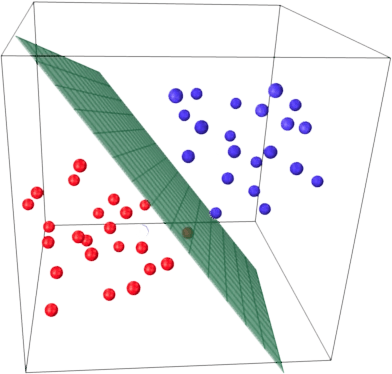


В этом уроке мы рассмотрим бинарную классификаци. (т.е. классификацию, в которой всего два класса).

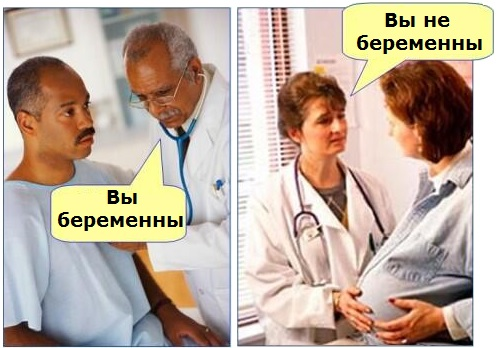

Описание данных:
Данные о пасажирах титаник. В датасете каждая строчка - это отдельный пассажир, со своими характеристиками (возраст, класс в котором он летел, кол-во родственников, пол и так далее).

В данной работе мы будем с помощью логистической регрессии (а это, напомню, линейный бинарный классификатор) классифицировать выжил пассажир или не выжил.
Т.е. всего два класса: выжил (1), не выжил (0).

Данные можно скачать с Kaggle:
https://www.kaggle.com/c/titanic



**1. Подключим все необходимые библиотеки.**

Какие библиотеки нам нужны?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

**1. Загрузим необходимые данных из csv файлов**

In [2]:
from google.colab import files #позволяет с локального компьютера загрузить в колаб какие то файлы
uploaded = files.upload()

Saving test (8).csv to test (8).csv
Saving train (10).csv to train (10).csv


In [25]:
train = pd.read_csv("train (10).csv")
test = pd.read_csv("test (8).csv")

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Исследуем наши данные:**


*   Какая размерность данных? (метод shape)
*   Какие типы данных представлены в наборе данных?
*   Исследуем данные на пустые значения (Nan)
*   Какие исследования данных еще можно сделать?





In [6]:
# размерность у train - это датафрейм в котором набор данных для обучения
print(train.shape)
# размерность у test
# shape - возвращает размерность датафрейма (кол-во строк, кол-во столбцов)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
#какие типы данных представлены в наборе
# info()
# dtypes
print(train.info())
print(test.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked 

In [8]:
#есть ли пустые значения в данных? Nan
# name_dataframe.isna() - проверку на пустые значение
print("________________________________________")
print(train.isna().sum())
print("________________________________________")
print(test.isna().sum())

________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**3. Подготовим данные для классификации**

*   Удалим/заполним пустые значения
*   Преобразуем категориальные признаки в числовые



In [9]:
# обработаем сначала train

# не удалять Age, заполним пустые
# вместо пустых запишем среднее
# fillna(value) - заменяет пустые на значение value
# value = train['Age'].mean()
# train['Age'] = train['Age'].fillna(value)

# у нас классы в которых плыли пассажиры (1,2,3)
# средний возраст для каждого класса
# groupby("Pclass") - группируем пассажирова по классам 
# mean()['Age'] - считаем средний в каждой группе
# round() - округление числа (возрас - это целое число)
# train.groupby("Pclass").mean()['Age'] = (ср возраст 1, ср возраст 2, ср возраст 3)
mean_class1 = train.groupby("Pclass").mean()['Age'].round().loc[1]
mean_class2 = train.groupby("Pclass").mean()['Age'].round().loc[2]
mean_class3 = train.groupby("Pclass").mean()['Age'].round().loc[3]
print(mean_class1, mean_class2, mean_class3)

# loc - позволяет обращаться к строчкам по индексам и столбцам по имени(Age, Pclass и т д) df.loc[1, 'Age']
# iloc - к столбцам и строчкам по индексам ( df.iloc[3,4])
# [train["Pclass"]==1, 'Age'] - до запятой это строчки (номер конкретной строчки(5), диапазон строчек(0:5), условие на основе которого нам нужно выбрать строчки)
# после запятой указываются столбцы
train.loc[train["Pclass"]==1, 'Age'] = train.loc[train["Pclass"]==1, 'Age'].fillna(mean_class1)
train.loc[train["Pclass"]==2, 'Age'] = train.loc[train["Pclass"]==2, 'Age'].fillna(mean_class2)
train.loc[train["Pclass"]==3, 'Age'] = train.loc[train["Pclass"]==3, 'Age'].fillna(mean_class3)

print(train.isna().sum())

38.0 30.0 25.0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# размерность train (891, 12)
# в данном случае у нас в столбце Cabin 687 из 891
# удалите этот столбец
# drop - позволяет удалять строки или столбцы
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
train = train.drop(['Cabin'], axis=1)
print(train.isna().sum())
# Embarked 2
# dropna - удаляет пустые строчки или столбцы в которых есть Nan
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
train = train.dropna()
print("___________После обработки всех пустых значений______________")
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
___________После обработки всех пустых значений______________
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [11]:
# Преобразуем категориальные признаки (Sex: male female) => Sex: 0 или 1
# Есть два метода: Get_dummies() - метод который встроен в библиотеку pandas
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0


In [12]:
# PassengerId, Name, Ticket - это ненужные столбцы, которые не несут смысловой нагрузки, удаляем
train = train.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)
train

# что еще обработать или улучшить?
# Pclass - рассматриваем как категориальный (1,2,3) и преобразовываем
# Age - разбить на диапазоны
# min_age - 25
# 25-40
# 40 - max_age

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


**4. Разделим данные на тестовые и тренировочные**

Что значит тестовые и тренировочные данные?
Зачем нужно разделять тестовые и тренировочные?
Как можно разделить данные?

**Данные**

- тренировочный набор - набор для того, чтобы тренировать модель
- тестовый набор - набор для того, чтобы тестировать модель. Тестовая выборка, представляет из себя аналогичный набор наблюдений, который используется для оценки качества модели, используя некоторые показатели.

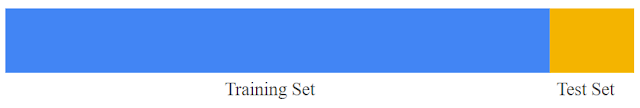

In [16]:
%%time
from sklearn.model_selection import train_test_split

# train - на тренировочные и тестовые
X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model = LogisticRegression()
# model = KMeans()
# model = LinearRegression()

# модель учится, для этого ей нужны правильные
model.fit(X_train, y_train)

# тестируем, для признаков у которых нет ответов, мы предсказывает ответ
answers_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
from sklearn.metrics import accuracy_score

# Как оценить насколько хорошо работает ваша модель?

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(accuracy_score(y_test,answers_pred))

0.8127340823970037


In [19]:
print(X_train.shape)
print(y_train.shape)

(622, 10)
(622,)


**5. Подготовьте и преобразуйте данные из файла test.csv самостоятельно по аналогии с train.csv**

In [26]:
# удалить или заменить заменить пустые значение
# преобразовать категориальные признаки

# подготовим тестовые данные по аналогии с тренировочными
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)

# в тестовых есть одно пропущенное значение в колонке Fare - заменим его на среднее
test['Fare'] = test['Fare'].fillna(value=test['Fare'].mean())

# удалим столбец в котором много пропусков
test.drop('Cabin',axis=1,inplace=True)

# преобразуем категориальные признаки
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])
print("Shape:", test.shape)

#удалим не нужные столбцы (не несут смысла для классификации)
test = test.drop(['Name','Ticket'],axis=1)

#выведем преобразованный датафремй
# head() - выводит первые пять строчек датафрейма
test.head()

Shape: (418, 13)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


**6. Создадим нашу модель и обучим ее.**

In [28]:
# выше уже создали и обучили модель
# теперь создаем ответы для тестовых данных (для них нет правильных ответов)
predictions = model.predict(test.drop(columns=['PassengerId']))
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [29]:
# при желании можно запустить эту ячеку, она создаст csv  с ответами в нужном формате
# и их можно загрузить на kagle на соревнование и проверить качество своей модели
#  https://www.kaggle.com/c/titanic/data?select=train.csv
final_prediction = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

final_prediction.shape

final_prediction.to_csv('final_prediction.csv', index=False)
files.download("final_prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

P.s. что еще можно почитать/посмотреть/попробовать сделать?

1. Подробно рассказано о логистической регрессии на другом примере данных (не все вещи мы оттуда проходили, но их можно и не использовать, например SMOTE или RFE)

https://medium.com/nuances-of-programming/%D0%BF%D0%BE%D1%88%D0%B0%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8-%D0%B2-python-a7c650ae77c2

2. Еще один пример с другим датасетом, очеь подробно и понятно (опять же не все проходили, но то что не проходили можно и не использовать)

https://nagornyy.me/courses/data-science/classification/

3. Видео с курсеры про логистическую регрессию (всего 3 минуты) (тут сложная математика, но в целом достаточно понятно рассказано)

https://www.coursera.org/lecture/python-for-data-science/loghistichieskaia-rieghriessiia-MwZfQ
